In [1]:
from utils import *
from DGD import *
from gradient_tracking import *
from dualdec import *

## Load data

Nb agents : 5
Nb data points : 100
Nb selected points : 10
Points per agent : 20.0



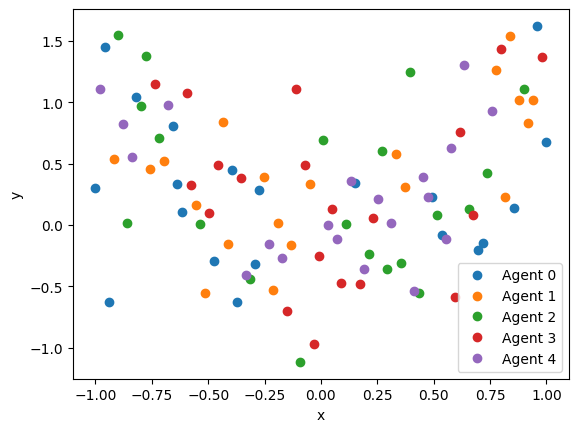

In [2]:
# Generate the data
a = 5
n = 100
m = 10
agent_x, agent_y, x_selected, y_selected, selected_points, selected_points_agents, K, x, y = get_agents_from_pickle(
    'first_database.pkl', a, n, m)
print(f'Nb agents : {a}')
print(f'Nb data points : {n}')
print(f'Nb selected points : {m}')
print(f'Points per agent : {n/a}\n')

# # Data visualization per agent
for i in range(a):
    plt.plot(agent_x[i], agent_y[i], 'o', label=f'Agent {i}')
# plt.plot(x, y, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
def visualize_predict(alpha_list, alpha_optim_linalg, alpha_optim, agent_x, agent_y, x_selected):
    # Data visualization
    # Y = np.linalg.norm(alpha_list - alpha_optim, axis=1)
    # unpack the list of alpha to get for each agent the evolution of alpha
    agent_1 = np.linalg.norm(np.array(
        [alpha_list[i][0] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_2 = np.linalg.norm(np.array(
        [alpha_list[i][1] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_3 = np.linalg.norm(np.array(
        [alpha_list[i][2] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_4 = np.linalg.norm(np.array(
        [alpha_list[i][3] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_5 = np.linalg.norm(np.array(
        [alpha_list[i][4] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    plt.plot(agent_1, label='Agent 1', color='blue')
    plt.plot(agent_2, label='Agent 2', color='red')
    plt.plot(agent_3, label='Agent 3', color='green')
    plt.plot(agent_4, label='Agent 4', color='orange')
    plt.plot(agent_5, label='Agent 5', color='purple')
    plt.xlabel('Iterations')
    plt.ylabel('Optimality gap (norm)')
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()
    # Plot selected points and the prediction of the model with the alpha optimal 
    plt.figure(0)
    for i in range(a):
        plt.plot(agent_x[i], agent_y[i], 'o', label=f'Agent {i+1}')
    x_predict = np.linspace(-1, 1, 250)
    K_f = kernel_matrix(x_predict, x_selected)
    fx_predict = K_f @ alpha_optim
    plt.plot(x_predict, fx_predict, label='Prediction')
    plt.grid()
    plt.legend()
    plt.show()

- Plot the convergence varying the graph structure (from a line to a small-world graph to a fully
connected one)

- Visualize the obtained functions by testing them on a uniform grid of dimension nt = 250, that is
    for the points $x_0$
    computed as,
    x_prime=np.linspace(-1,1,nt)

- Try to break convergence by adding **directed communication, package losses, asynchronicity**.

- (Optional) Recover convergence with the push-sum protocol in the case of directed communication.

- In all the above please justify what you see by the theory that you have studied in class.

- Increase n as much as you can, maintaining $m=\sqrt{n}$, and redo the above. Here you are also
    allowed to increase the number of agents if needed. In this case, the centralized solution may not
    be computable, so then plot other metrics to gauge convergence.
    The team that has reached the highest n gets one bonus point.
- How convergence depends on $n$?


## Gradient Tracking

Compute the alpha optimal....
Time to compute alpha optimal : 0.004999637603759766

alpha optimal : [ 0.43478386  0.01997065 -0.32477639  0.16794105 -0.27432971 -0.6737758
  0.61806312 -0.02029358  0.75614777  0.5183861 ]

Compute the alpha optimal with the gradient tracking algorithm....
[[0.  0.5 0.  0.  0.5]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5 0. ]]


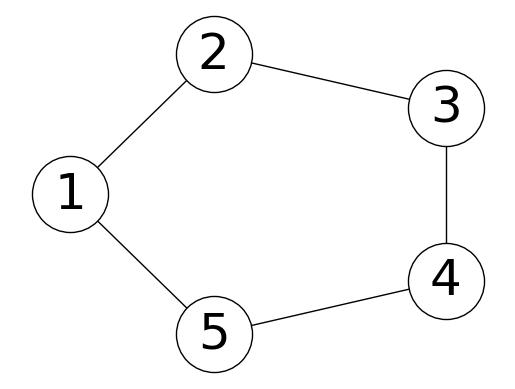

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 5584.40it/s]


alpha optimal with gradient tracking : [-47.48956583  15.06880356  54.93043079   4.70621898  59.67873422
 -86.31191868 -11.19953003 -18.64625217  30.74495627   5.24868291]
Time to compute alpha optimal with gradient tracking : 1.7958309650421143
Total iterations : 9999



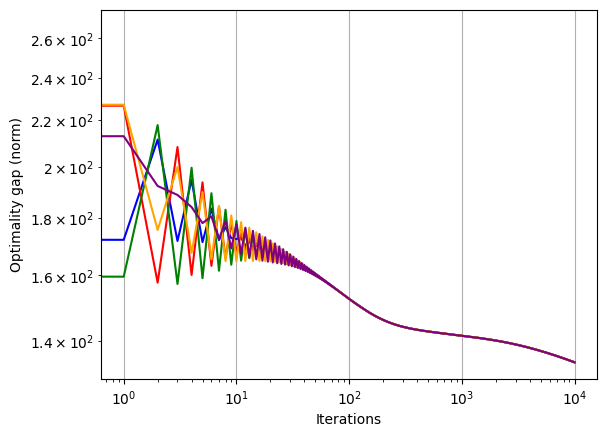

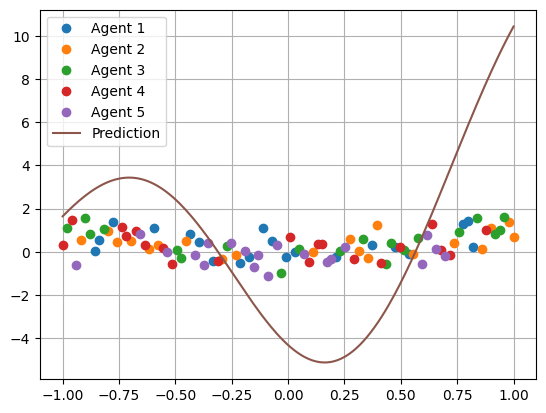

In [42]:
# Compute the alpha optimal
print("Compute the alpha optimal....")
sigma = 0.5
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# Compute the alpha optimal with the gradient tracking algorithm
print("Compute the alpha optimal with the gradient tracking algorithm....")
mu = 0.1
lr = 0.0001
max_iter = 10000

# create the weight matrix
ind = [(0,1), (1,2), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)

print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
start = time.time()
alpha_optim_gt, tot_ite, alpha_list = gradient_tracking_v2(
    x, y, selected_points, selected_points_agents, K, sigma, mu, lr, W, max_iter=max_iter)
end = time.time()
print(f'alpha optimal with gradient tracking : {alpha_optim_gt}')
print(
    f'Time to compute alpha optimal with gradient tracking : {end - start}')
print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_gt, agent_x, agent_y, x_selected)

In [43]:
#alpha_list is shape (nb_iter, 5, m)
alpha_list[0].shape

(5, 10)

## Dual decomposition


Compute the alpha optimal....
Time to compute alpha optimal : 0.008997440338134766

alpha optimal : [ 0.43478386  0.01997065 -0.32477639  0.16794105 -0.27432971 -0.6737758
  0.61806312 -0.02029358  0.75614777  0.5183861 ]

[[0.  0.5 0.  0.  0.5]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5 0. ]]


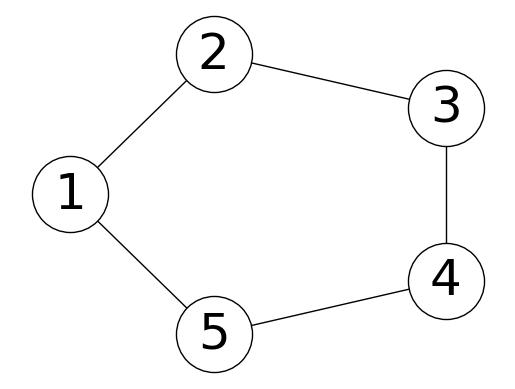

TEST MATRICE DOUBLE STO :  True


100%|██████████| 1000/1000 [00:00<00:00, 6407.57it/s]

alpha optimal with dual decomposition : [ 0.40549735  0.01738781 -0.28059398  0.1556564  -0.2558267  -0.6057189
  0.55573436 -0.00595012  0.6743374   0.48361309]
Time to compute alpha optimal with dual decomposition : 0.15906929969787598


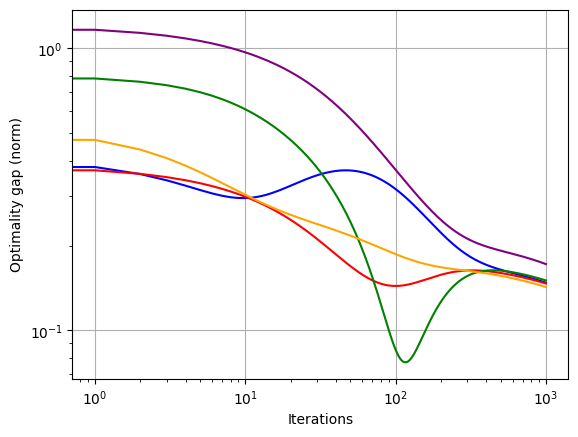

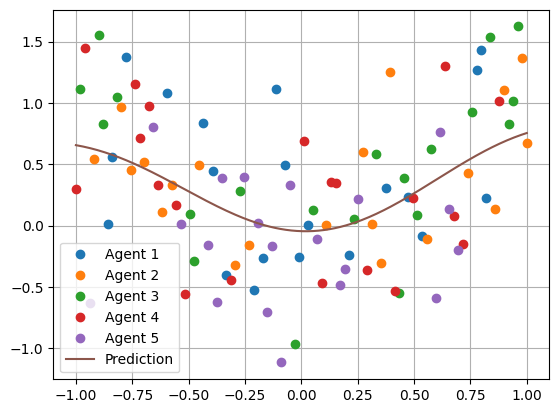

In [43]:
sigma=0.5
mu=0.1
# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# create the weight matrix
ind = [(0,1), (1,2), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)
# W = np.array([[1/3, 1/3, 0, 0, 1/3],
#               [1/3, 1/3, 1/3, 0, 0],
#               [0, 1/3, 1/3, 1/3, 0],
#               [0, 0, 1/3, 1/3, 1/3],
#               [1/3, 0, 0, 1/3, 1/3]])
print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
# Compute the alpha optimal with the dual decomposition algorithm
start = time.time()
alpha_optim_dualdec, alpha_list, alpha_mean_list = dualDec(
    x, y, selected_points, selected_points_agents,
    K, sigma, mu, 0.01, W, max_iter=1000, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim_dualdec}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_dualdec, agent_x, agent_y, x_selected)


## FedAvg

X shape :  (5, 20)
Y shape :  (5, 20)
Compute the alpha optimal....
Time to compute alpha optimal : 0.007999897003173828

alpha optimal : [ 0.62445435  0.45908727  0.2113655  -0.07285095 -0.31601168 -0.42589478
 -0.33441328 -0.04036401  0.37500557  0.77795698]

K shape :  (10, 10)
Kim shape :  (20, 10)


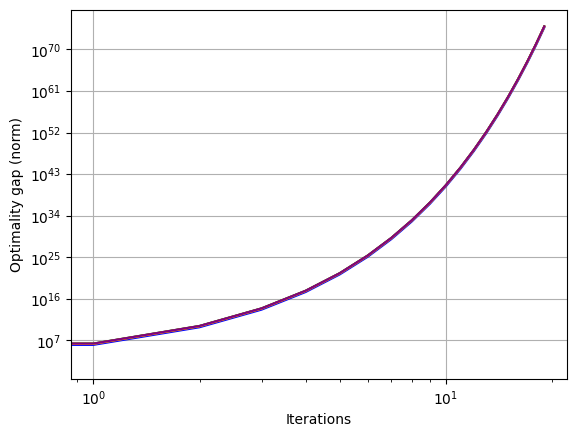

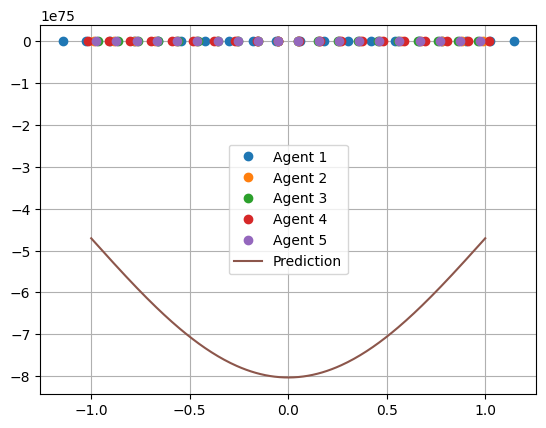

In [4]:
from fedAvg import *
a = 5
n = 100
m = 10
sigma = 0.5
mu = 10

with open('second_database.pkl', 'rb') as f:
    X, Y = pickle.load(f)
X = np.array(X)
Y = np.array(Y)

print("X shape : ", X.shape)
print("Y shape : ", Y.shape)
x_m_points=np.linspace(-1,1,m)

# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(X.reshape(len(X)*X.shape[1]), Y.reshape(len(Y)*Y.shape[1]), x_m_points, sigma)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

K = kernel_matrix(x_m_points, x_m_points)
Kim = []
for i in range(a):
    Kim.append(kernel_matrix(X[i], x_m_points))
print("K shape : ", K.shape)   
print("Kim shape : ", Kim[0].shape)

T = 20
E = 50
lr = 0.002
alpha_server, alpha_agents, alpha_agents_list, alpha_server_list  = fedAvg(
    X, Y, x_m_points, T, E, K, Kim, sigma, mu, lr)
# print("Alpha server : ", alpha_server)
# print("Alpha agents : ", alpha_agents)
visualize_predict(alpha_agents_list, alpha_optim, alpha_server, X, Y, x_m_points)